<a href="https://colab.research.google.com/github/ADRIANATORREZANI/ADRIANATORREZANI/blob/main/CNN_MNIST_Adriana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Carrega os dados
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normaliza os pixels (de 0-255 para 0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Adiciona canal (CNN espera formato (28, 28, 1) para imagens em tons de cinza)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (0 a 9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9032 - loss: 0.3181 - val_accuracy: 0.9853 - val_loss: 0.0458
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9851 - loss: 0.0492 - val_accuracy: 0.9869 - val_loss: 0.0406
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9905 - loss: 0.0311 - val_accuracy: 0.9880 - val_loss: 0.0318
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9936 - loss: 0.0205 - val_accuracy: 0.9894 - val_loss: 0.0334
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9950 - loss: 0.0163 - val_accuracy: 0.9908 - val_loss: 0.0275


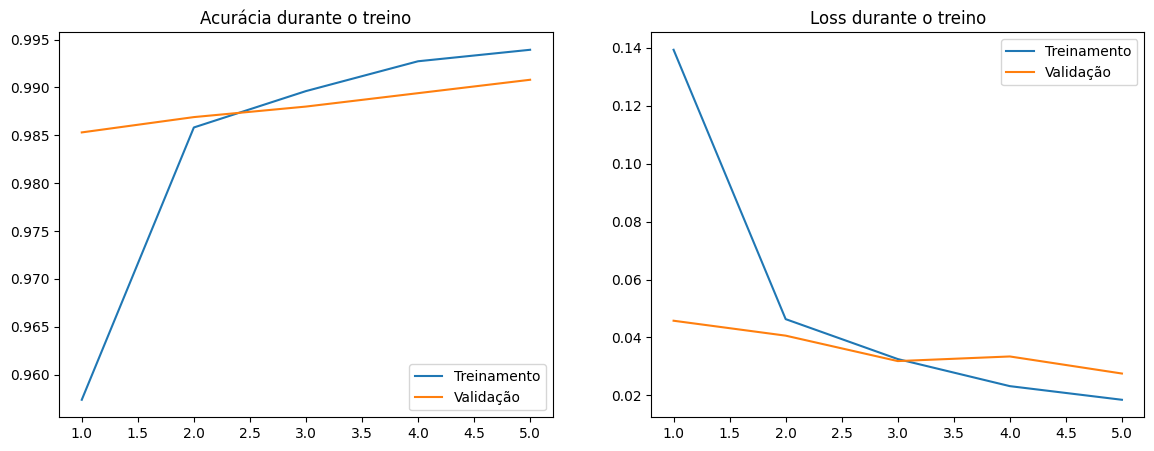

In [ ]:
plota_resultados(history, 5)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nAcurácia no teste: {test_acc:.4f}')

313/313 - 1s - 4ms/step - accuracy: 0.9908 - loss: 0.0275

Acurácia no teste: 0.9908


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


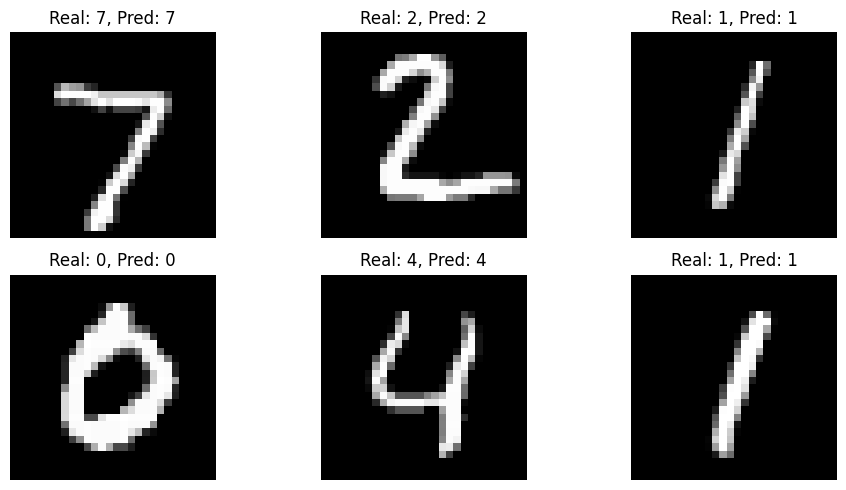

In [ ]:
import numpy as np

predictions = model.predict(test_images)

plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Real: {test_labels[i]}, Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


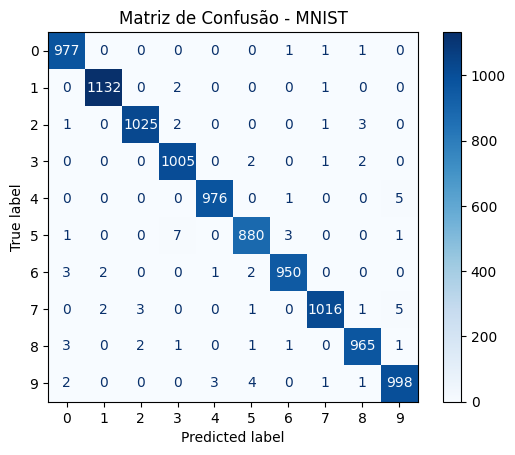

In [ ]:
# Previsões (como índices das classes preditas)
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matriz de confusão
cm = confusion_matrix(test_labels, y_pred_classes)

# Exibir matriz de confusão com rótulos
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - MNIST")
plt.show()
